# Spotify 2022 Most Listened to Songs Analysis 
## Final Report
### Tiffany Marks 

In [1]:
import pandas as pd
import json
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import requests

On November 30, 2022, Spotify released its yearly Spotify Wrapped campaign. It's a fun way for users to see their listening data for the year. Along with personal and individual data for single users, Spotify collected the most listened to songs of 2022. I'm going to find the top 50 songs of 2022 and see what made those songs so popular and what kind of music musicians of 2023 should try to make.

To start my report I'll need to collect Spotify information which means I need to get my Spotify client ID.

In [2]:
keys = pd.read_csv("Spotify-Keys_10-18-22", header = 0, sep = ",")

In [3]:
appid = keys['Client_ID'][0]

In [4]:
appsecret = keys['Client_Secret'][0]

In [5]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [6]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [7]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [8]:
response = requests.post(access_token_url, headers = header, data = payload)

In [9]:
session_token = response.json()['access_token']

In [10]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

Now that I have that, I have to get the top 50 Spotify songs of 2022. I planned to use the playlist that Spotify already had but figured that it would be safer for me to create a playlist of the top 50 most listened to songs in case Spotify deletes or alters their playlist. I will grab my playlist's URI so I can collect the data for all 50 songs. 

This Top 50 Songs of 2022 playlist was created on December 1st, 2022

### Playlist Data Collection

I have to get the playlist's URI code to add it to the playlist endpoint

In [11]:
playlist = '27HaXqLrsN31FyG46FJ6WJ' 

In [12]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(playlist)

Now that I have the endpoint, I can get the data that I need.

In [13]:
playlist_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [14]:
playlist_tracks.status_code

200

In [15]:
playlist_dict = json.loads(playlist_tracks.text)

I'm now grabbing the 'tracks' key...

In [16]:
playlist_dict.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

...where I'll be able to grab 'items'...

In [17]:
playlist_dict['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

...which has the 'track' key!

In [18]:
playlist_dict['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

Now with this information, I can get the data of all 50 songs on the playlist using the x for x method

In [19]:
playlist_all_tracks = [x['track'] for x in playlist_dict['tracks']['items']]

I'm going to make the playlist tracks into a DataFrame so I can read the data easier.

In [20]:
most_streamed = pd.DataFrame(playlist_all_tracks)

### DataFrame Organization

This DataFrame has the information on all the songs that I have. I don't need all of the information and some of the columns still need to be split up.

In [21]:
most_streamed.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,167303,False,False,{'isrc': 'USSM12200612'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,4Dvkj6JhhA12EX05fT7y2e,False,As It Was,92,https://p.scdn.co/mp3-preview/f0c2adc40766cd8c...,True,4,track,spotify:track:4Dvkj6JhhA12EX05fT7y2e
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,238805,False,False,{'isrc': 'GBUM72000433'},{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,02MWAaffLxlfxAUY7c5dvx,False,Heat Waves,87,https://p.scdn.co/mp3-preview/1ac449e52145d1c4...,True,14,track,spotify:track:02MWAaffLxlfxAUY7c5dvx
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,232066,False,True,{'isrc': 'USRC12201440'},{'spotify': 'https://open.spotify.com/track/4k...,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,4k6Uh1HXdhtusDW5y8Gbvy,False,Bad Habit,88,https://p.scdn.co/mp3-preview/b46cf3781e6cbe5b...,True,5,track,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,178567,False,True,{'isrc': 'QM6MZ2214877'},{'spotify': 'https://open.spotify.com/track/6S...,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,6Sq7ltF9Qa7SNFBsV5Cogx,False,Me Porto Bonito,96,https://p.scdn.co/mp3-preview/8513b15fb5b39966...,True,3,track,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,173947,False,True,{'isrc': 'USAT22203024'},{'spotify': 'https://open.spotify.com/track/0w...,https://api.spotify.com/v1/tracks/0wHFktze2PHC...,0wHFktze2PHC5jDt3B17DC,False,First Class,85,https://p.scdn.co/mp3-preview/ec2263e955b141e7...,True,4,track,spotify:track:0wHFktze2PHC5jDt3B17DC


To start, I will remove columns that aren't needed for the analysis and create draft 2 of the full DataFrame

In [22]:
most_streamed2 = most_streamed.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'external_urls', 'href', 'is_local', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [23]:
most_streamed2.head()

,album,artists,duration_ms,explicit,id,name,popularity
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,92
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,238805,False,02MWAaffLxlfxAUY7c5dvx,Heat Waves,87
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,232066,True,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,88
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,178567,True,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,96
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,173947,True,0wHFktze2PHC5jDt3B17DC,First Class,85


Next I'll go through columns, album and artist, to separate and remove any data I don't need.

I'll start with Artist. First I'll see what is in the artist column to see what I need to remove and keep

In [24]:
pd.DataFrame(most_streamed2['artists'][0])

,external_urls,href,id,name,type,uri
0,{'spotify': 'https://open.spotify.com/artist/6...,https://api.spotify.com/v1/artists/6KImCVD70vt...,6KImCVD70vtIoJWnq6nGn3,Harry Styles,artist,spotify:artist:6KImCVD70vtIoJWnq6nGn3


All I need is the name column so I'll use the x for x method to collect all 50 artist names

In [25]:
artist = [x[0]['name'] for x in most_streamed2['artists']]
artists_name =  pd.DataFrame(artist)
artists_name.head()

,0
0,Harry Styles
1,Glass Animals
2,Steve Lacy
3,Bad Bunny
4,Jack Harlow


I will add artist_name to the most_streamed2 DataFrame and drop the artists column

In [26]:
most_streamed2['artists_name'] = artists_name
most_streamed2.drop(columns = ['artists']).head()

,album,duration_ms,explicit,id,name,popularity,artists_name
0,"{'album_type': 'album', 'artists': [{'external...",167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,92,Harry Styles
1,"{'album_type': 'album', 'artists': [{'external...",238805,False,02MWAaffLxlfxAUY7c5dvx,Heat Waves,87,Glass Animals
2,"{'album_type': 'album', 'artists': [{'external...",232066,True,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,88,Steve Lacy
3,"{'album_type': 'album', 'artists': [{'external...",178567,True,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,96,Bad Bunny
4,"{'album_type': 'album', 'artists': [{'external...",173947,True,0wHFktze2PHC5jDt3B17DC,First Class,85,Jack Harlow


Now I have to tackle the album data. I have to use the list function as the previous method used for artist does not work. The data within the album column is surrounded by {}

In [27]:
album_data = pd.DataFrame(list(most_streamed2['album']))
album_data.head()

,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/5r...,https://api.spotify.com/v1/albums/5r36AJ6VOJtp...,5r36AJ6VOJtp00oxSkBZ5h,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Harry's House,2022-05-20,day,13,album,spotify:album:5r36AJ6VOJtp00oxSkBZ5h
1,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/0K...,https://api.spotify.com/v1/albums/0KTj6k94XZh0...,0KTj6k94XZh0c6IEMfxeWV,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Dreamland (+ Bonus Levels),2020-08-06,day,18,album,spotify:album:0KTj6k94XZh0c6IEMfxeWV
2,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/3K...,https://api.spotify.com/v1/albums/3Ks0eeH0GWpY...,3Ks0eeH0GWpY4AU20D5HPD,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Gemini Rights,2022-07-15,day,10,album,spotify:album:3Ks0eeH0GWpY4AU20D5HPD
3,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/3R...,https://api.spotify.com/v1/albums/3RQQmkQEvNCY...,3RQQmkQEvNCY4prGKE6oc5,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Un Verano Sin Ti,2022-05-06,day,23,album,spotify:album:3RQQmkQEvNCY4prGKE6oc5
4,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/2e...,https://api.spotify.com/v1/albums/2eE8BVirX9VF...,2eE8BVirX9VF8Di9hD90iw,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Come Home The Kids Miss You,2022-05-06,day,15,album,spotify:album:2eE8BVirX9VF8Di9hD90iw


I'm able to see all columns within the album column so I just have to take the name column out and add it to the most_streamed2 DataFrame. I will also take the album_released_date column as well.

In [28]:
most_streamed2['album_name'] = album_data['name']
most_streamed2['album_release_date'] = album_data['release_date']

I finally I will drop the album column out the most_streamed2 DataFrame. Next I'll create a new final DataFrame, most_streamed3 where I'll rearrange the columns and add new information.

In [29]:
most_streamed3 = most_streamed2.drop(columns = ['album'])
most_streamed3 = most_streamed3[['id', 'name', 'artists_name', 'duration_ms', 'explicit', 'album_name', 'album_release_date', 'popularity']]
most_streamed3.head()

,id,name,artists_name,duration_ms,explicit,album_name,album_release_date,popularity
0,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,167303,False,Harry's House,2022-05-20,92
1,02MWAaffLxlfxAUY7c5dvx,Heat Waves,Glass Animals,238805,False,Dreamland (+ Bonus Levels),2020-08-06,87
2,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,Steve Lacy,232066,True,Gemini Rights,2022-07-15,88
3,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,178567,True,Un Verano Sin Ti,2022-05-06,96
4,0wHFktze2PHC5jDt3B17DC,First Class,Jack Harlow,173947,True,Come Home The Kids Miss You,2022-05-06,85


I created a csv file where I can add data I'm not able to quickly find with the Spotify API. I added a language column, ranking column to show where the song ranks on the most played list, how long the song is in a more readable format, the month the song was release and the year it was released. I added the artist name and song name to keep track of which song I'm working with.

In [30]:
data_to_add = pd.read_csv('most_streamed_Songs_2022.csv', sep = ',')

In [31]:
data_to_add.head()

,rank_num,name,artists_name,time,lang,month,year
0,1,As It Was,Harry Styles,2:47,en,5,2022
1,2,Heat Waves,Glass Animals,3:59,en,8,2020
2,3,Bad Habit,Steve Lacy,3:52,en,7,2022
3,4,Me Porto Bonito,Bad Bunny,2:59,sp,5,2022
4,5,First Class,Jack Harlow,2:54,en,5,2022


Now I'll add the columns that I need to the most_streamed3 DataFrame

In [32]:
most_streamed3['rank_num'] = data_to_add['rank_num']
most_streamed3['time'] = data_to_add['time']
most_streamed3['lang'] = data_to_add['lang']
most_streamed3['month'] = data_to_add['month']
most_streamed3['year'] = data_to_add['year']
most_streamed3.head()

,id,name,artists_name,duration_ms,explicit,album_name,album_release_date,popularity,rank_num,time,lang,month,year
0,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,167303,False,Harry's House,2022-05-20,92,1,2:47,en,5,2022
1,02MWAaffLxlfxAUY7c5dvx,Heat Waves,Glass Animals,238805,False,Dreamland (+ Bonus Levels),2020-08-06,87,2,3:59,en,8,2020
2,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,Steve Lacy,232066,True,Gemini Rights,2022-07-15,88,3,3:52,en,7,2022
3,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,178567,True,Un Verano Sin Ti,2022-05-06,96,4,2:59,sp,5,2022
4,0wHFktze2PHC5jDt3B17DC,First Class,Jack Harlow,173947,True,Come Home The Kids Miss You,2022-05-06,85,5,2:54,en,5,2022


I now have the DataFrame for all the track information I want

### Getting the Audio Features for the DataFrame

Next I will need the audio features Spotify provides to add on the final DataFrame. I have to use the tracks ID to get each songs individual audio features.

In [33]:
most_streamed_ids = most_streamed3['id']

In [34]:
most_streamed_strings = ','.join(str(x) for x in most_streamed_ids)
most_streamed_strings

'4Dvkj6JhhA12EX05fT7y2e,02MWAaffLxlfxAUY7c5dvx,4k6Uh1HXdhtusDW5y8Gbvy,6Sq7ltF9Qa7SNFBsV5Cogx,0wHFktze2PHC5jDt3B17DC,1IHWl5LamUGEuP4ozKQSXZ,5PjdY0CKGZdEuoNab3yDmX,29d0nY7TzCoi22XBqDQkiP,2QjOHCTQ1Jl3zawyYOpxh6,3EaJDYHA0KnX88JvDhL9oa,52xJxFP6TqMuO4Yt0eOkMz,5Z9KJZvQzH6PFmb8SNkxuk,4ewazQLXFTDC8XvCbhvtXs,68Dni7IE4VyPkTOH9mRWHr,1Y5Jvi3eLi4Chwqch9GMem,2BcMwX1MPV6ZHP4tUT9uq6,59nOXPmaKlBfGMDeOVGrIK,6HMtHNpW6YPi1hrw9tgF8P,3CIyK1V4JEJkg02E4EJnDl,58ge6dfP91o9oXMzq3XkIS,4SqWKzw0CbA05TGszDgMlc,4ZtFanR9U6ndgddUvNcjcG,6Uj1ctrBOjOas8xZXGqKk4,3F5CgOj3wFlRv51JsHbxhe,6I3mqTwhRpn34SLVafSH7G,2LBqCSwhJGcFQeTHMVGwy3,1qEmFfgcLObUfQm0j1W2CK,7rglLriMNBPAyuJOMGwi39,3QFInJAm9eyaho5vBzxInN,3cBsEDNhFI9E82vPj3kvi3,3Vi5XqYrmQgOYBajMWSvCi,0O6u0VJ46W86TxN9wgyqDj,6Xom58OOXk2SoU711L2IXO,3XOalgusokruzA5ZBA2Qcb,5Eax0qFko2dh7Rl2lYs3bx,5uU1uuyaUIBOiiUSQG7Wl3,3DarAbFujv6eYNliUTyqtz,3WMj8moIAXJhHsyLaqIIHI,50nfwKoDiSYg8zOCREWAm5,0e8nrvls4Qqv5Rfa2UhqmO,4h4QlmocP3IuwYEj2j14p8,7KA4W4McWYRpgf0fWsJZWB,5CZ40GBx1sQ9agT82CLQCT,3GZD6HmiNU

I will add these IDs to the audio features endpoint

In [35]:
most_streamed_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(most_streamed_strings)

In [36]:
most_streamed_features_endpoint

'https://api.spotify.com/v1/audio-features?ids=4Dvkj6JhhA12EX05fT7y2e,02MWAaffLxlfxAUY7c5dvx,4k6Uh1HXdhtusDW5y8Gbvy,6Sq7ltF9Qa7SNFBsV5Cogx,0wHFktze2PHC5jDt3B17DC,1IHWl5LamUGEuP4ozKQSXZ,5PjdY0CKGZdEuoNab3yDmX,29d0nY7TzCoi22XBqDQkiP,2QjOHCTQ1Jl3zawyYOpxh6,3EaJDYHA0KnX88JvDhL9oa,52xJxFP6TqMuO4Yt0eOkMz,5Z9KJZvQzH6PFmb8SNkxuk,4ewazQLXFTDC8XvCbhvtXs,68Dni7IE4VyPkTOH9mRWHr,1Y5Jvi3eLi4Chwqch9GMem,2BcMwX1MPV6ZHP4tUT9uq6,59nOXPmaKlBfGMDeOVGrIK,6HMtHNpW6YPi1hrw9tgF8P,3CIyK1V4JEJkg02E4EJnDl,58ge6dfP91o9oXMzq3XkIS,4SqWKzw0CbA05TGszDgMlc,4ZtFanR9U6ndgddUvNcjcG,6Uj1ctrBOjOas8xZXGqKk4,3F5CgOj3wFlRv51JsHbxhe,6I3mqTwhRpn34SLVafSH7G,2LBqCSwhJGcFQeTHMVGwy3,1qEmFfgcLObUfQm0j1W2CK,7rglLriMNBPAyuJOMGwi39,3QFInJAm9eyaho5vBzxInN,3cBsEDNhFI9E82vPj3kvi3,3Vi5XqYrmQgOYBajMWSvCi,0O6u0VJ46W86TxN9wgyqDj,6Xom58OOXk2SoU711L2IXO,3XOalgusokruzA5ZBA2Qcb,5Eax0qFko2dh7Rl2lYs3bx,5uU1uuyaUIBOiiUSQG7Wl3,3DarAbFujv6eYNliUTyqtz,3WMj8moIAXJhHsyLaqIIHI,50nfwKoDiSYg8zOCREWAm5,0e8nrvls4Qqv5Rfa2UhqmO,4h4QlmocP3IuwYEj2j14p8,7KA4W4McWY

In [37]:
most_streamed_features = requests.get(most_streamed_features_endpoint, headers = session_header)

In [38]:
most_streamed_features.status_code

200

In [39]:
most_streamed_dict = json.loads(most_streamed_features.text)

In [40]:
most_streamed_dict.keys()

dict_keys(['audio_features'])

In [41]:
most_streamed_audio_features = most_streamed_dict['audio_features']

I now have all 50 tracks ID features in a dictionary format. I will change it into a DataFrame.

In [42]:
most_streamed_df = pd.DataFrame(most_streamed_audio_features)

In [43]:
most_streamed_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4
1,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,238805,4
2,0.686,0.494,1,-7.093,1,0.0355,0.6130,0.000058,0.4020,0.700,168.946,audio_features,4k6Uh1HXdhtusDW5y8Gbvy,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,https://api.spotify.com/v1/audio-analysis/4k6U...,232067,4
3,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,audio_features,6Sq7ltF9Qa7SNFBsV5Cogx,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4
4,0.902,0.582,5,-5.902,0,0.1090,0.1110,0.000003,0.1110,0.332,107.005,audio_features,0wHFktze2PHC5jDt3B17DC,spotify:track:0wHFktze2PHC5jDt3B17DC,https://api.spotify.com/v1/tracks/0wHFktze2PHC...,https://api.spotify.com/v1/audio-analysis/0wHF...,173948,4


Last part of the organization is to add each audio feature to the final DataFrame and rename the full dataframe to most_streamed_Songs since I now have all the information I need

In [44]:
most_streamed_Songs = most_streamed3

In [45]:
most_streamed_Songs['danceability'] = most_streamed_df['danceability']
most_streamed_Songs['energy'] = most_streamed_df['energy']
most_streamed_Songs['key'] = most_streamed_df['key']
most_streamed_Songs['loudness'] = most_streamed_df['loudness']
most_streamed_Songs['mode'] = most_streamed_df['mode']
most_streamed_Songs['speechiness'] = most_streamed_df['speechiness']
most_streamed_Songs['acousticness'] = most_streamed_df['acousticness']
most_streamed_Songs['instrumentalness'] = most_streamed_df['instrumentalness']
most_streamed_Songs['liveness'] = most_streamed_df['liveness']
most_streamed_Songs['valence'] = most_streamed_df['valence']
most_streamed_Songs['tempo'] = most_streamed_df['tempo']
most_streamed_Songs['id'] = most_streamed_df['id']
most_streamed_Songs['duration_ms'] = most_streamed_df['duration_ms']
most_streamed_Songs['time_signature'] = most_streamed_df['time_signature']

In [46]:
pd.options.display.max_columns = None
most_streamed_Songs

,id,name,artists_name,duration_ms,explicit,album_name,album_release_date,popularity,rank_num,time,lang,month,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,167303,False,Harry's House,2022-05-20,92,1,2:47,en,5,2022,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.6620,173.930,4
1,02MWAaffLxlfxAUY7c5dvx,Heat Waves,Glass Animals,238805,False,Dreamland (+ Bonus Levels),2020-08-06,87,2,3:59,en,8,2020,0.761,0.525,11,-6.900,1,0.0944,0.440000,0.000007,0.0921,0.5310,80.870,4
2,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,Steve Lacy,232067,True,Gemini Rights,2022-07-15,88,3,3:52,en,7,2022,0.686,0.494,1,-7.093,1,0.0355,0.613000,0.000058,0.4020,0.7000,168.946,4
3,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,178567,True,Un Verano Sin Ti,2022-05-06,96,4,2:59,sp,5,2022,0.911,0.712,1,-5.105,0,0.0817,0.090100,0.000027,0.0933,0.4250,92.005,4
4,0wHFktze2PHC5jDt3B17DC,First Class,Jack Harlow,173948,True,Come Home The Kids Miss You,2022-05-06,85,5,2:54,en,5,2022,0.902,0.582,5,-5.902,0,0.1090,0.111000,0.000003,0.1110,0.3320,107.005,4
5,1IHWl5LamUGEuP4ozKQSXZ,Tití Me Preguntó,Bad Bunny,243717,False,Un Verano Sin Ti,2022-05-06,95,6,4:04,sp,5,2022,0.650,0.715,5,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.1870,106.672,4
6,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),The Kid LAROI,141806,True,F*CK LOVE 3: OVER YOU,2021-07-23,86,7,2:22,en,7,2021,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.4780,169.928,4
7,29d0nY7TzCoi22XBqDQkiP,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,300840,False,Hounds of Love (2018 Remaster),1985-09-16,81,8,5:01,en,9,1985,0.625,0.533,10,-11.903,0,0.0596,0.659000,0.002660,0.0546,0.1390,108.296,4
8,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,240400,False,I Love You.,2013-04-19,93,9,4:00,en,4,2013,0.612,0.807,10,-2.810,1,0.0336,0.049500,0.017700,0.1010,0.3980,124.053,4
9,3EaJDYHA0KnX88JvDhL9oa,Dark Red,Steve Lacy,173104,False,Dark Red,2017-02-20,89,10,2:53,en,2,2017,0.603,0.784,6,-4.023,1,0.0620,0.446000,0.000008,0.1190,0.7690,172.041,4


So before starting the analysis, above is the DataFrame I will use for collected information.  First id is the song's identification number. I have the song's name, singer or singers, if it's explicit or not, how long the songs were, album it came from, language and release date. I have the rank_num that has the ranking number each song reached in 2022 streamed, "As It Was" being highest and "Heartless" being lowest. This information appears on the DataFrame, mostly for reference so I know what specific song I'm working with. The last section of columns are the audio features.

I attempted to collect each songs streaming numbers, but because not every song was released in 2022, some songs released before 2022 appear to beat As It Was as most streamed. I haven't found a way to collect the specific amount of streams for each songs only from 2022. Also I don't think that that specific streaming number is important 

### Spotify Data Analysis

Now with the most_streamed_Songs DataFrame, I'm going to use Histograms and Barplots to see how each of the 50 tracks correlate with each audio feature.

In [47]:
count_lang = most_streamed_Songs.groupby('lang').count()['id']
labels_lang = ['en', 'sp']
count_mode = most_streamed_Songs.groupby('mode').count()['id']
labels_mode = ['0', '1']

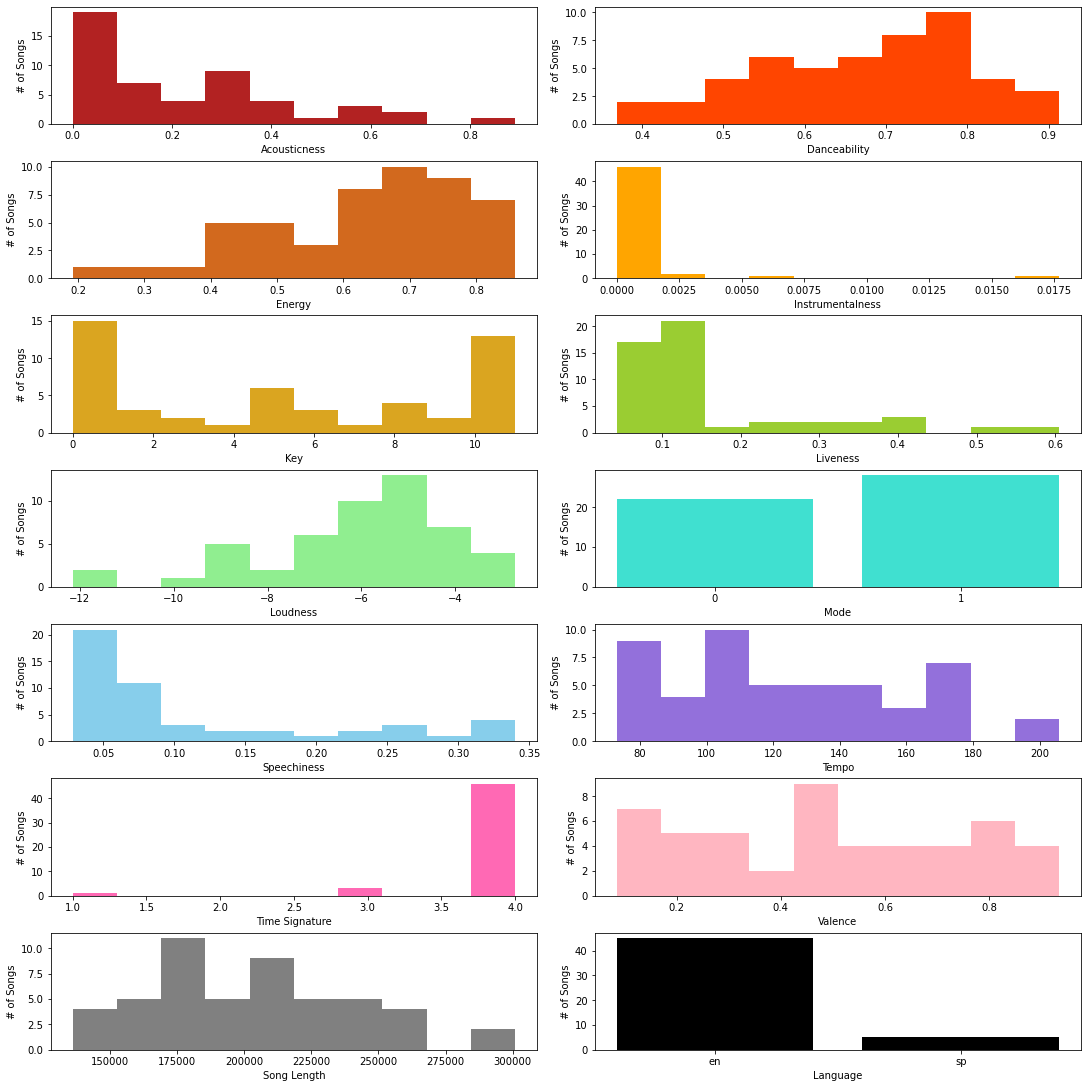

In [48]:
fig1, ax1 = plt.subplots(7, 2, layout = 'constrained') # (rows, columns)
fig1.set_figwidth(15) #change width size of the table
fig1.set_figheight(15) #change height size of the table
ax1[0, 0].hist(most_streamed_Songs['acousticness'], color = 'firebrick')
ax1[0, 0].set_ylabel('# of Songs')
ax1[0, 0].set_xlabel('Acousticness')
ax1[0, 1].hist(most_streamed_Songs['danceability'], color = 'orangered')
ax1[0, 1].set_ylabel('# of Songs')
ax1[0, 1].set_xlabel('Danceability')
ax1[1, 0].hist(most_streamed_Songs['energy'], color = 'chocolate')
ax1[1, 0].set_ylabel('# of Songs')
ax1[1, 0].set_xlabel('Energy')
ax1[1, 1].hist(most_streamed_Songs['instrumentalness'], color = 'orange')
ax1[1, 1].set_ylabel('# of Songs')
ax1[1, 1].set_xlabel('Instrumentalness')
ax1[2, 0].hist(most_streamed_Songs['key'], color = 'goldenrod')
ax1[2, 0].set_ylabel('# of Songs')
ax1[2, 0].set_xlabel('Key')
ax1[2, 1].hist(most_streamed_Songs['liveness'], color = 'yellowgreen')
ax1[2, 1].set_ylabel('# of Songs')
ax1[2, 1].set_xlabel('Liveness')
ax1[3, 0].hist(most_streamed_Songs['loudness'], color = 'lightgreen')
ax1[3, 0].set_ylabel('# of Songs')
ax1[3, 0].set_xlabel('Loudness')
ax1[3, 1].bar(labels_mode, count_mode, color = 'turquoise')
ax1[3, 1].set_ylabel('# of Songs')
ax1[3, 1].set_xlabel('Mode')
ax1[4, 0].hist(most_streamed_Songs['speechiness'], color = 'skyblue')
ax1[4, 0].set_ylabel('# of Songs')
ax1[4, 0].set_xlabel('Speechiness')
ax1[4, 1].hist(most_streamed_Songs['tempo'], color = 'mediumpurple')
ax1[4, 1].set_ylabel('# of Songs')
ax1[4, 1].set_xlabel('Tempo')
ax1[5, 0].hist(most_streamed_Songs['time_signature'], color = 'hotpink')
ax1[5, 0].set_ylabel('# of Songs')
ax1[5, 0].set_xlabel('Time Signature')
ax1[5, 1].hist(most_streamed_Songs['valence'], color = 'lightpink')
ax1[5, 1].set_ylabel('# of Songs')
ax1[5, 1].set_xlabel('Valence')
ax1[6, 0].hist(most_streamed_Songs['duration_ms'], color = 'gray')
ax1[6, 0].set_ylabel('# of Songs')
ax1[6, 0].set_xlabel('Song Length')
ax1[6, 1].bar(labels_lang, count_lang, color = 'black')
ax1[6, 1].set_ylabel('# of Songs')
ax1[6, 1].set_xlabel('Language')
plt.show()

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

I used histograms to compare all 50 tracks categorized by Audio Features. 
- A majority of songs were not acoustic. 
- Songs were leaned more danceable and energetic. 
- A majority of songs were not instrumentally driven. 
- Most of the keys of songs had a value of 1 which means, according to the documentation, the songs were in C.
- A majority of the songs were studio recorded over and not live.
- None of the songs were too loud. 
- More than 50% of the songs had a value of 1 meaning they were in major while less than 50% had the value of 0 meaning they were in minor.
- A majority of the songs were non-speech. 
- Songs had less than 180 beats per minute with an exception of 2 songs.
- Nearly every song had Time Signature of 4 beats per bar except for 3 songs. 2 songs had 3 beats per bar and one song had 1 beat per bar.
- The valence score was a mixed amount, but a majority of songs having a 5 valence score. 
- Songs have mostly been around 2 minutes and 55 seconds, but mostly under 4 minutes and 30 seconds.

Histogram data for Audio Features such as Instrumentalness, Time Signature and Language at a glance allows the songwriters to know that more vocal heavy songs in English with a time signature of 4 beats per bar are more likely to trend over instrumental songs with a different time signature.

Other Audio Features such as Valence, Time Length and Tempo are a mixed bag. The best thing to do with those features is use the Stream ranking to see where the higher ranked songs landed for each Audio Track.  

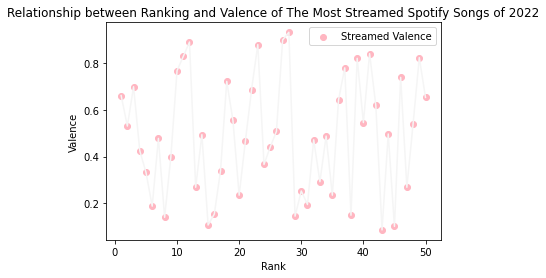

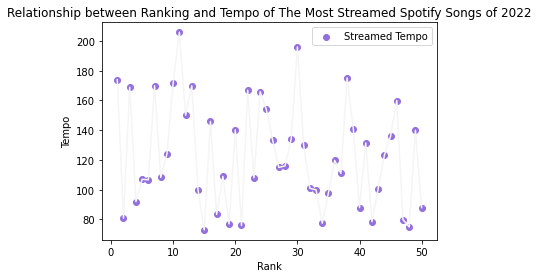

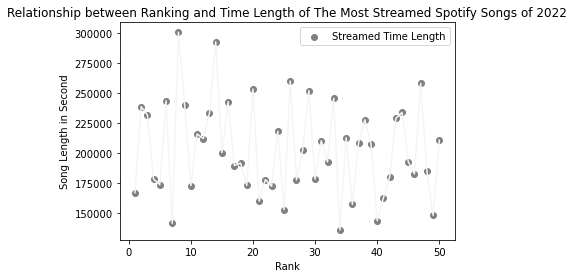

In [49]:
fig2, ax2 = plt.subplots()
ax2.scatter(most_streamed_Songs['rank_num'], most_streamed_Songs['valence'], label = 'Streamed Valence', color = 'lightpink')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Valence')
ax2.set_title('Relationship between Ranking and Valence of The Most Streamed Spotify Songs of 2022')
ax2.legend()
plt.plot(most_streamed_Songs['rank_num'], most_streamed_Songs['valence'],  color = 'whitesmoke')
plt.show()

fig3, ax3 = plt.subplots()
ax3.scatter(most_streamed_Songs['rank_num'], most_streamed_Songs['tempo'], label = 'Streamed Tempo', color = 'mediumpurple')
ax3.set_xlabel('Rank')
ax3.set_ylabel('Tempo')
ax3.set_title('Relationship between Ranking and Tempo of The Most Streamed Spotify Songs of 2022')
ax3.legend()
plt.plot(most_streamed_Songs['rank_num'], most_streamed_Songs['tempo'],  color = 'whitesmoke')
plt.show()

fig4, ax4 = plt.subplots()
ax4.scatter(most_streamed_Songs['rank_num'], most_streamed_Songs['duration_ms'], label = 'Streamed Time Length', color = 'gray')
ax4.set_xlabel('Rank')
ax4.set_ylabel('Song Length in Second')
ax4.set_title('Relationship between Ranking and Time Length of The Most Streamed Spotify Songs of 2022')
ax4.legend()
plt.plot(most_streamed_Songs['rank_num'], most_streamed_Songs['duration_ms'],  color = 'whitesmoke')
plt.show()

With these scatter plots we can now see that a song's tempo or time length has no effect on its popularity. I added lines to the scatter plot so viewers can read the scatter plot easier.

Another factor that could effect popularity would be release time. I'm going to see what year most of the popular songs of 2022 were released.

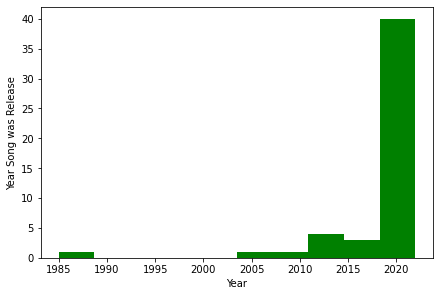

In [50]:
fig5, ax5 = plt.subplots(layout = 'constrained')
ax5.hist(most_streamed_Songs['year'], color = 'green')
ax5.set_ylabel('Year Song was Release')
ax5.set_xlabel('Year')
plt.show()

Many of these songs were released around 2020, I'm going to now see how many of these songs were released this year.

In [51]:
The2022Tracks = pd.DataFrame(most_streamed_Songs[most_streamed_Songs['year'] > 2021])

In [52]:
The2022Tracks.count()

id                    22
name                  22
artists_name          22
duration_ms           22
explicit              22
album_name            22
album_release_date    22
popularity            22
rank_num              22
time                  22
lang                  22
month                 22
year                  22
danceability          22
energy                22
key                   22
loudness              22
mode                  22
speechiness           22
acousticness          22
instrumentalness      22
liveness              22
valence               22
tempo                 22
time_signature        22
dtype: int64

22 out of the 50 tracks were release in 2022. Now I'm going to see what months these songs were released

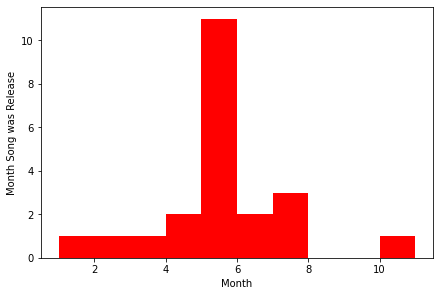

In [53]:
fig6, ax6 = plt.subplots(layout = 'constrained')
ax6.hist(The2022Tracks['month'], color = 'red')
ax6.set_ylabel('Month Song was Release')
ax6.set_xlabel('Month')
plt.show()

From this histogram, half of the Tracks were released in May. Note Joji's Glimpse of us was pre-released and started streaming in June, the album it appeared on came out in November. It may be a good idea to release songs around the late spring or early summer.

Analyzing the popular music of this year and the audio features they all have can be beneficial for songwriters and musicians that want to make popular music. The information provided from this Analysis, Scatter plots and histogram gives musicians an idea of when to release music and the audio features needed to increase the chances of releasing a popular song. It is also important to keep in mind the outside forces that lead to a song's popularity. The popularity of the artist can be a factor. Harry Styles, for example, has a very large fanbase which affected his popularity. The song's popularity outside of Spotify will affect its popularity as well: was it shared a lot on Social Media platforms like Tiktok or Instagram? Lizzo's About Damn Time was used a lot for dances on Tiktok. Was the song used in a popular Netflix show like Kate Bush's Running Up That Hill in Stranger Things?

This still shouldn't stop musician's from trying to reach success as lesser known artists like Steve Lacy recently managed to reach mainstream success in 2022 despite being an active musician since 2013. 